In [134]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
import numpy as np
import cv2 as cv
import random
from matplotlib import pyplot as plt
img_address = "drive/My Drive/Colab Notebooks/images.jpg"
img = cv.imread(img_address, 0)
img_address2 = "drive/My Drive/Colab Notebooks/grayscale.jpg"
img2 = cv.imread(img_address2, 0)

In [136]:
# calculate histogram of the given image
def caclculate_histo(img):
    histo = np.zeros(256, np.int32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            histo[img[i][j]] += 1
    return histo

In [137]:
def global_equalize_library(img):
    equ_img = cv.equalizeHist(img)
    plt.imshow(equ_img, cmap=plt.get_cmap('gray'))
    plt.plot()
    return equ_img


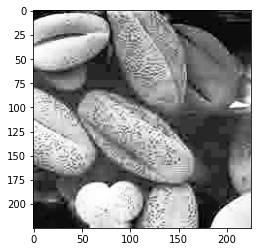

In [138]:
# global equalization with library
global_equalize_library = global_equalize_library(img)

In [139]:
def global_equalize(img):
  img_equalize(img)

In [140]:
def img_equalize(img):
  new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  cumulative = np.zeros(256)
  histo = caclculate_histo(img)
  constant = (img.shape[0] * img.shape[1])/255
  cumulative[0] = histo[0]*constant
  for i in range(1, len(histo)):
    cumulative[i]=histo[i]*constant
    cumulative[i]=cumulative[i-1]+cumulative[i]
  for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
          new_img[i][j] = cumulative[img[i][j]]
  plt.imshow(new_img, cmap=plt.get_cmap('gray'))
  plt.plot()
  return new_img

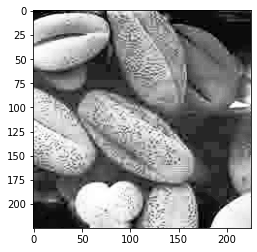

In [141]:
# global equalization
global_equalize = global_equalize(img)

In [142]:
def local_equalize(img,x_pieces_number,y_pieces_number):
  #print(img.shape[0],img.shape[1])
  M = img.shape[0]//x_pieces_number
  N = img.shape[1]//y_pieces_number
  #print(N,M)
  tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]
  for i in range(0,len(tiles)):
    tiles[i] = img_equalize(tiles[i])
  new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  for i in range(1,len(tiles)+1):
    if(i % y_pieces_number==0):
      t1 = (int(i/y_pieces_number)-1)*M
      t2 = (int(i/y_pieces_number))*M
      for j in range(1 ,y_pieces_number+1 ):
        c1 = (j-1)*N
        c2 = (j)*N 
        #print(i,j,t1,t2,c1,c2,(i-y_pieces_number+j-1),tiles[i-y_pieces_number+j-1].shape)
        new_img[t1:t2,c1:c2] = tiles[i-y_pieces_number+j-1]
  plt.imshow(new_img, cmap=plt.get_cmap('gray'))
  plt.plot()
  return new_img

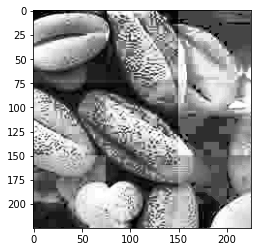

In [143]:
# local equalization
local_equalize = local_equalize(img,3,3)

In [144]:
def img_enchance(img,E, k0, k1, k2, global_mean, global_variance):
  m = mean(img)
  v = variance(img)
  new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  if (k1 * global_variance) <= v <= (k2 * global_variance) and m <= (k0 * global_mean):
      for i in range(0, img.shape[0]):
          for j in range(0, img.shape[1]):
              img[i][j] = E * img[i][j]
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.plot()
  return img

In [145]:
def local_enchance(img,x_pieces_number,y_pieces_number,E, k0, k1, k2, mg, vg):
  #print(img.shape[0],img.shape[1])
  M = img.shape[0]//x_pieces_number
  N = img.shape[1]//y_pieces_number
  #print(N,M)
  tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]
  for i in range(0,len(tiles)):
    tiles[i] = img_enchance(tiles[i],E, k0, k1, k2, mg, vg)
  new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
  for i in range(1,len(tiles)+1):
    if(i % y_pieces_number==0):
      t1 = (int(i/y_pieces_number)-1)*M
      t2 = (int(i/y_pieces_number))*M
      for j in range(1 ,y_pieces_number+1 ):
        c1 = (j-1)*N
        c2 = (j)*N 
        #print(i,j,t1,t2,c1,c2,(i-y_pieces_number+j-1),tiles[i-y_pieces_number+j-1].shape)
        new_img[t1:t2,c1:c2] = tiles[i-y_pieces_number+j-1]
  plt.imshow(new_img, cmap=plt.get_cmap('gray'))
  plt.plot()
  return new_img

In [146]:
def mean(img):
  mean =0
  for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
            mean +=img[i][j]
  return mean/(img.shape[0]*img.shape[1])

In [147]:
def variance(img):
  m = mean(img)
  variance=0
  for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
            variance +=((img[i][j] - m)**2)
  return variance/(img.shape[0]*img.shape[1])

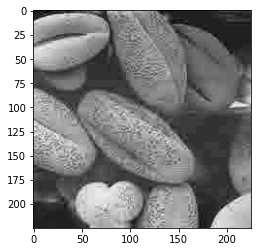

In [148]:
# local enchancement
local_enchance = local_enchance(img,x_pieces_number=3,y_pieces_number=3, E=2, k0=0.4, k1=0.02, k2=0.4, mg=mean(img), vg=variance(img))

In [149]:
def sp_noise(img,prob):
    new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                new_img[i][j] = 0
            elif rdn > (1-prob):
                new_img[i][j] = 255
            else:
                new_img[i][j] = img[i][j]
    plt.imshow(new_img, cmap=plt.get_cmap('gray'))
    plt.plot()
    return new_img

In [150]:
def find_neighbors(img, x, y):
    x_index = [0,0,0,-1,-1,-1,1,1,1]
    y_index = [-1,0,1,-1,0,1,-1,0,1]
    temp = []
    size_x = np.shape(data)[0]
    size_y = np.shape(data)[1]
    for i in range(len(ni_x)):
        new_x = x + ni_x[i]
        new_y = y + ni_y[i]
        if -1 < new_x < img.shape[0] and -1 < new_y < img.shape[1]:
            result.append(img[new_x][new_y])
            counter += 1
    return np.array(result)

In [151]:
def median_filter(img, filter_size):
    temp = []
    index = filter_size // 2
    new_img = []
    new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]== 0 or img[i][j] == 255 :
              coun=0
              for z in range(filter_size):
                if -1<i + z - index < img.shape[0]:   
                    for k in range(filter_size):
                      if(-1<j + k - index<img.shape[1]):
                          temp.append(img[i + z - index][j + k - index])
              temp.sort()
              new_img[i][j] = temp[int(len(temp) / 2)]
              temp = []
            else:
              new_img[i][j]= img[i][j]
    plt.imshow(new_img, cmap=plt.get_cmap('gray'))
    plt.plot()
    return new_img

In [152]:
def smoothing_filter(img, filter_size):
    temp = []
    index = filter_size // 2
    new_img = []
    new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]== 0 or img[i][j] == 255 :
              for z in range(filter_size):
                if -1<i + z - index < img.shape[0]:   
                    for k in range(filter_size):
                      if(-1<j + k - index<img.shape[1]):
                          temp.append(img[i + z - index][j + k - index])
              mean = 0
              for m in range(len(temp)):
                mean+=temp[m]
              mean = mean/len(temp)
              new_img[i][j] =mean
              temp = []
            else:
              new_img[i][j]= img[i][j]
    plt.imshow(new_img, cmap=plt.get_cmap('gray'))
    plt.plot() 
    return new_img

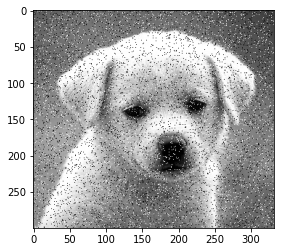

In [153]:
# salt and papper noise
sp_noise_img = sp_noise(img2, 0.05)

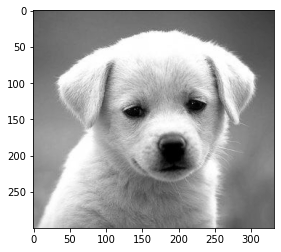

In [154]:
# median filter
median_filter_img = median_filter(sp_noise_img, 3)

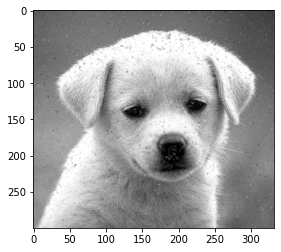

In [155]:
# smothing filter
smoothing_filter_img = smoothing_filter(sp_noise_img, 3)

In [156]:
def gauss_noise(img,mean,standard_deviation):
    gaussian = np.random.normal(mean,standard_deviation,(img.shape[0],img.shape[1]))
    gaussian = gaussian.reshape(img.shape[0],img.shape[1]).astype('uint8')
    gauss_noise_img =cv.add(img , gaussian)
    plt.imshow(gauss_noise_img, cmap=plt.get_cmap('gray'))
    plt.plot() 
    return gauss_noise_img

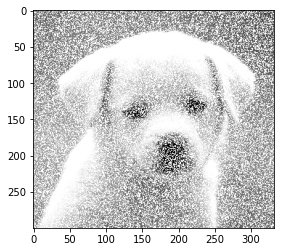

In [157]:
# gaussian noise
gauss_noise_img = gauss_noise(img2,0,5)

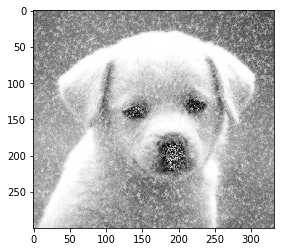

In [158]:
# smothing filter
smoothing_filter_img = smoothing_filter(gauss_noise_img, 5)

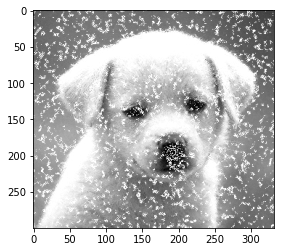

In [159]:
# median filter
median_filter_img = median_filter(gauss_noise_img, 5)